# Web Scraping i Automatització

In [12]:
pip install selenium

     ---------------------------------------- 6.3/6.3 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 384.9/384.9 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd   
from scrapy import Selector
from bs4 import BeautifulSoup
import scrapy
from scrapy.crawler import CrawlerProcess

import requests
from lxml import html
from urllib.request import urlopen
import urllib
from urllib.error import HTTPError
from urllib.error import URLError

from pprint import PrettyPrinter

In [2]:
from webdriver_manager.chrome import ChromeDriverManager 
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time 
from time import sleep

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service 

## Exercici 1

Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup i Selenium.

* [toscrape.com](https://quotes.toscrape.com/)

* [bolsasymercados.es](https://www.bolsasymercados.es/bme-exchange/es/Bolsa-Madrid)

* [wikipedia.org](https://es.wikipedia.org/wiki/Wikipedia:Portada)

### BeatifulSoap

El web scraping és una tècnica que permet extreure'n dades e informació d'una web, a través de les seves URL's.

Els paràmetres de consulta consten de tres parts:

* Inici: l'inici dels paràmetres de consulta es denota amb un signe d'interrogació ( ?).
* Informació: les peces d'informació que constitueixen un paràmetre de consulta es codifiquen en parells clau-valor, on les claus i els valors relacionats s'uneixen per un signe igual ( key=value).
* Separador: cada URL pot tenir diversos paràmetres de consulta, separats per un símbol i ( &).

*Beautiful Soup* és una biblioteca de Python per analitzar dades estructurades. Ens permet interactuar amb el codi de etiquetes de la pàgina web en HTML.

Per descarregar el contingut seleccionat de la pàgina web enviem una sol·licitud HTTP a l'URL a la qual voleu accedir. El servidor respon a la sol·licitud retornant el contingut HTML de la pàgina web.

Es crea el *soup*, és a dir, l'arbre d'objectes Python que representa el document HTML. A posteriori s'analitzarà les dades. La majoria de les dades HTML estan anidades, pertant serà necessari un analitzador on poder crear una estructura anidada o d'arbre de les dades HTML.

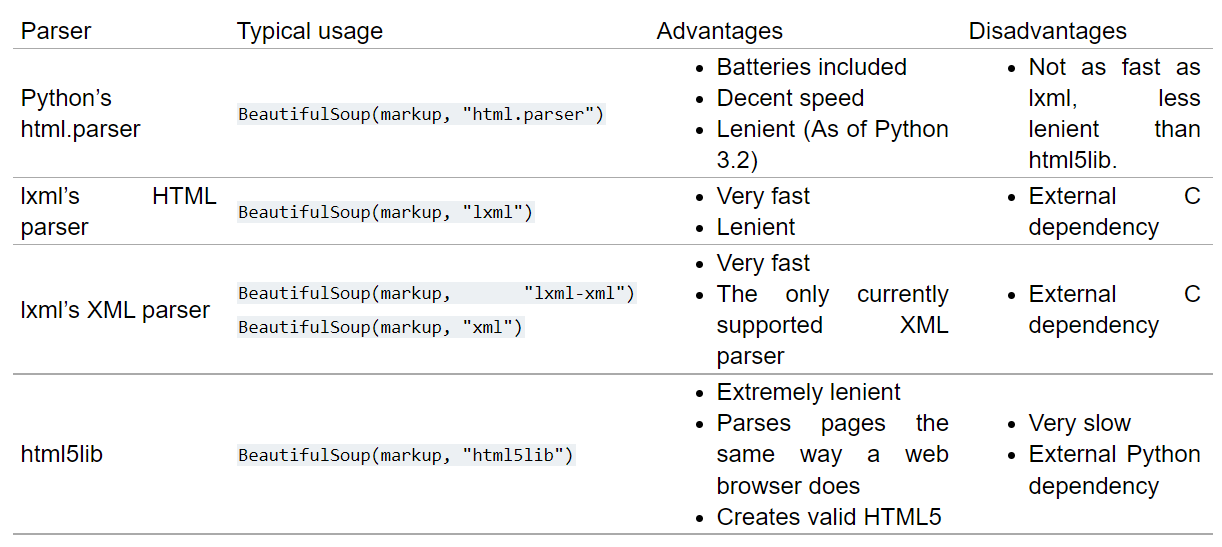

#### website: Quotes to Scrape

Cada *qoute* a http://quotes.toscrape.com/ s'inclou en un div amb l'etiqueta class="quote". El contingut de la quote es troba en un interval amb class="text" i el nom de l'autor es troba en una etiqueta amb class="author" dins del div. Aquesta informació serà necessària per a analitzar l'HTML i extreure dades.

In [3]:
url_quote = requests.get('https://quotes.toscrape.com/')
soup_quote = BeautifulSoup(url_quote.content,'html.parser')

print(url_quote.text)

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itempr

In [4]:
#Prettify mostrarà el contingut dins dels tags
print(soup_quote.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Quotes to Scrape
  </title>
  <link href="/static/bootstrap.min.css" rel="stylesheet"/>
  <link href="/static/main.css" rel="stylesheet"/>
 </head>
 <body>
  <div class="container">
   <div class="row header-box">
    <div class="col-md-8">
     <h1>
      <a href="/" style="text-decoration: none">
       Quotes to Scrape
      </a>
     </h1>
    </div>
    <div class="col-md-4">
     <p>
      <a href="/login">
       Login
      </a>
     </p>
    </div>
   </div>
   <div class="row">
    <div class="col-md-8">
     <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
      <span class="text" itemprop="text">
       “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
      </span>
      <span>
       by
       <small class="author" itemprop="author">
        Albert Einstein
       </small>
       <a href="/author/Albert

In [5]:
#verifiquem
url_quote.status_code

200

In [6]:
title_quote = soup_quote.title
print('Titol de la pàgina web:', title_quote)

Titol de la pàgina web: <title>Quotes to Scrape</title>


In [7]:
res_quote = soup_quote.find_all('div', class_='quote')
len(res_quote)

10

In [8]:
res_author = soup_quote.find_all(class_="author")
res_text = soup_quote.find_all('span', class_='text')

In [9]:
#Funció per crear el Llistat de les quotes de la 1a pàgina

def get_quotes_page1(res_quote):
    quotes_list=[]
    for tag in res_quote:
        quote=tag.find('span', class_='text').text
        quotes_list.append(quote)
    return quotes_list

get_quotes_page1(res_quote)

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
 '“Try not to become a man of success. Rather become a man of value.”',
 '“It is better to be hated for what you are than to be loved for what you are not.”',
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
 '“A day without sunshine is like, you know, night.”']

In [10]:
#Funció per obtenir el llistat d'autors de la 1a pàgina
    
def get_authors_page1(res_quote):
    author_list = []

    for i in res_quote:      
        author_list.append(i.find(class_ = "author").text)
    return author_list    

get_authors_page1(res_quote)

['Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Jane Austen',
 'Marilyn Monroe',
 'Albert Einstein',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin']

In [11]:
quotes_list = []
author_list = []

for i in res_quote: 
    quotes_list.append(i.find(class_ = "text").text)
    author_list.append(i.find(class_ = "author").text)

In [12]:
#Construïm la taula

table = pd.DataFrame({'Author':author_list, 'Quote':quotes_list})
pd.options.display.max_colwidth = 2000
table.style.set_properties(**{'text-align': 'left'})

,Author,Quote
0,Albert Einstein,“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
1,J.K. Rowling,"“It is our choices, Harry, that show what we truly are, far more than our abilities.”"
2,Albert Einstein,“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
3,Jane Austen,"“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”"
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"
5,Albert Einstein,“Try not to become a man of success. Rather become a man of value.”
6,André Gide,“It is better to be hated for what you are than to be loved for what you are not.”
7,Thomas A. Edison,"“I have not failed. I've just found 10,000 ways that won't work.”"
8,Eleanor Roosevelt,“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
9,Steve Martin,"“A day without sunshine is like, you know, night.”"


In [18]:
#Extreure les quotes i autors de més d'una pàgina

authors_xpage = []
quotes_xpage = []

url_base = 'https://quotes.toscrape.com/'
page = 0
MAX_pages = 5

for i in range(page, MAX_pages):
    if i >= 1:
        url = "%spage/%d/" % (url_base, i)
    else:
        url = url_base
        
    response = requests.get(url)
    status_Code = response.status_code
    
    if status_Code == 200:
    
        html = BeautifulSoup(response.text, "html.parser")
        response_quotes = html.find_all('div', class_='quote')

        for e in response_quotes:
            page += 1
            quote_text=e.find(class_ = "text").text
            quotes_xpage.append(quote_text)
            autor_quote=e.find(class_ = "author").text
            authors_xpage.append(autor_quote)

    else:
         print(status_Code)

In [19]:
#Construïm una 2a taula

table = pd.DataFrame({'Pàgina': page, 'URL': url, 'Author':authors_xpage, 'Quote':quotes_xpage })
pd.options.display.max_colwidth = 2000
table.style.set_properties(**{'text-align': 'left'})

,Pàgina,URL,Author,Quote
0,50,https://quotes.toscrape.com/page/4/,Albert Einstein,“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
1,50,https://quotes.toscrape.com/page/4/,J.K. Rowling,"“It is our choices, Harry, that show what we truly are, far more than our abilities.”"
2,50,https://quotes.toscrape.com/page/4/,Albert Einstein,“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
3,50,https://quotes.toscrape.com/page/4/,Jane Austen,"“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”"
4,50,https://quotes.toscrape.com/page/4/,Marilyn Monroe,"“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"
5,50,https://quotes.toscrape.com/page/4/,Albert Einstein,“Try not to become a man of success. Rather become a man of value.”
6,50,https://quotes.toscrape.com/page/4/,André Gide,“It is better to be hated for what you are than to be loved for what you are not.”
7,50,https://quotes.toscrape.com/page/4/,Thomas A. Edison,"“I have not failed. I've just found 10,000 ways that won't work.”"
8,50,https://quotes.toscrape.com/page/4/,Eleanor Roosevelt,“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
9,50,https://quotes.toscrape.com/page/4/,Steve Martin,"“A day without sunshine is like, you know, night.”"


In [13]:
table.to_csv('./quotes.csv', index=False)

### Selenium

Selenium és una eina de codi obert que s'utilitza per automatitzar les proves realitzades als navegadors web i admet l'automatització de tots els principals navegadors del mercat mitjançant l'ús de WebDriver. 

WebDriver és una API i un protocol que defineix una interfície de llenguatge neutral per controlar el comportament dels navegadors web.
Cada navegador està recolzat per una implementació específica de WebDriver, anomenada controlador. El controlador és el component responsable de la delegació al navegador i gestiona la comunicació amb Selenium i el navegador.


Procesos que podem automatitzar amb Selenium WebDriver: 
    
* Processos que estiguin en revisió constant amb l'objectiu d'executar la funcionalitat d'un mòdul per desenvolupadors o testers.
* Fluxos crítics i repetitius que hem de passar per arribar a un cert mòdul.
* Respostes de servidors amb peticions HTTP.
* Validacions de base de dades cap a la vista.
* Configuració en concret que ha de fer un usuari per poder entrar al sistema.

In [207]:
driver_quotes = webdriver.Chrome()

url_inspir = "https://quotes.toscrape.com/tag/inspirational/" 
driver_quotes.get(url_inspir)

In [15]:
print(driver_quotes.current_url)

https://quotes.toscrape.com/tag/inspirational/


In [31]:
title = driver_quotes.title
title

'Quotes to Scrape'

In [32]:
driver_quotes.implicitly_wait(0.8)

In [33]:
driver_quotes.page_source

'<html lang="en"><head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<h3>Viewing tag: <a href="/tag/inspirational/page/1/">inspirational</a></h3>\n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“There are only two ways to live your life. One is as though nothing is

In [34]:
driver_quotes.implicitly_wait(0.8)

In [35]:
quotes_scr = driver_quotes.find_element(By.CLASS_NAME, 'quote')
print(quotes_scr.text)

“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
by Albert Einstein (about)
Tags: inspirational life live miracle miracles


In [36]:
quotes_sp = driver_quotes.find_elements(by= By.XPATH, value = '//div[@class="quote"]')

In [37]:
quotes2 = []
author2 = []
for element in quotes_sp:
    quotes2.append(element.find_element(By.CLASS_NAME, 'text').text)
    author2.append(element.find_element(By.CLASS_NAME, 'author').text)


In [38]:
quotes2

['“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll n

In [39]:
author2

['Albert Einstein',
 'Marilyn Monroe',
 'Thomas A. Edison',
 'Marilyn Monroe',
 'Elie Wiesel',
 'J.K. Rowling',
 'George Eliot',
 'C.S. Lewis',
 'Martin Luther King Jr.',
 'Helen Keller']

In [40]:
table2 = pd.DataFrame({'Author':author2,'Quote':quotes2})
pd.options.display.max_colwidth = 2000
table2.style.set_properties(**{'text-align': 'left'})

,Author,Quote
0,Albert Einstein,“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
1,Marilyn Monroe,"“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"
2,Thomas A. Edison,"“I have not failed. I've just found 10,000 ways that won't work.”"
3,Marilyn Monroe,"“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most importantly, keep smiling, because life's a beautiful thing and there's so much to smile about.”"
4,Elie Wiesel,"“The opposite of love is not hate, it's indifference. The opposite of art is not ugliness, it's indifference. The opposite of faith is not heresy, it's indifference. And the opposite of life is not death, it's indifference.”"
5,J.K. Rowling,"“To the well-organized mind, death is but the next great adventure.”"
6,George Eliot,“It is never too late to be what you might have been.”
7,C.S. Lewis,“You can never get a cup of tea large enough or a book long enough to suit me.”
8,Martin Luther King Jr.,“Only in the darkness can you see the stars.”
9,Helen Keller,"“When one door of happiness closes, another opens; but often we look so long at the closed door that we do not see the one which has been opened for us.”"


### BeatifulSoap

#### website: BME Exchange

In [99]:
url = 'https://www.bolsasymercados.es'

In [100]:
#HTTP exceptions erase

def scrap_page(url):
    try:
    
        web = requests.get(url)

    except HTTPError as e:

        print(e)

    except URLError:

        print("Server down or incorrect domain")
    
    else:
        soup = BeautifulSoup(web.content, 'html.parser')
    
        return soup 

In [101]:
soup = scrap_page(url)

In [102]:
soup.title

<title>
	BME Bolsas y Mercados Españoles
</title>

In [103]:
list(soup.find_all('a'))

[<a class="navbar-brand" href="/esp/Home" target="_self"><img alt="Bolsas y Mercados Españoles" src="/images/Base/Logo.svg?v=Six"/></a>,
 <a class="btn-desplegable" href="#busqueda" role="button"><span class="icon busqueda2"></span><span class="sr-only">Buscador</span><span class="icon flechaIconCabDesp"></span></a>,
 <a href="/esp/Contacto"><span class="icon contacto2"></span><span class="sr-only">Contacto</span></a>,
 <a href="/ing/Home"><span aria-hidden="true"><strong>ES</strong> <b>|</b> EN</span><span class="sr-only">English</span></a>,
 <a aria-expanded="false" aria-haspopup="true" class="dropdown-toggle" data-menu="m0" data-toggle="dropdown" href="#" role="button"><span class="lineaMenuSup siteBME"></span>Sobre <br/>BME</a>,
 <a class="home" href="/esp/Sobre-BME" target="_self"><span class="icon-boton tit-menu"></span>Sobre <br/>BME</a>,
 <a class="" data-menu="m1" href="/esp/Sobre-BME/Que-es" target="_self">Qué es BME</a>,
 <a class="" data-menu="m2" href="/esp/Sobre-BME/Socie

In [104]:
links = []
for link in soup.find_all('a', string="Resumen de la sesión"):
    links.append(link.get('href'))

In [105]:
links

['/esp/Sobre-BME/Resumen-Sesion']

In [116]:
scrap_url = url+links[0]
scrap_url

'https://www.bolsasymercados.es/esp/Sobre-BME/Resumen-Sesion'

In [117]:
url_acciones = requests.get(scrap_url)
soupB = BeautifulSoup(url_acciones.content, 'html.parser')

In [118]:
url_acciones.status_code

200

In [119]:
soupB = scrap_page(scrap_url)
soupB


<!DOCTYPE html>

<html lang="es">
<head data-analytics-id="UA-76553630-1" data-app-path="/" data-hora-act="Sun, 29 Jan 2023 21:42:38 GMT" data-idioma="esp"><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Copyright © BME 2023" id="copyright" name="copyright"/>
<link href="//use.typekit.net/fag2lie.css" rel="stylesheet"/>
<script src="/js/Master?v=F0KMOqxkCNlCcsOWw-MJO6EfEk8-xYgiYH6aHTQhxJ01"></script>
<!--[if lt IE 9]><script src="/js/IE8?v=AwHxi_8NFX_q7iFCsiQGXsaZV01hRP3oN4vUoe_8Qm01"></script>
<![endif]--><link href="/css/css?v=RpCpGisDQ4R4HeqO7V0VMOS8B5lr6FzQ7ErUOJDe3fA1" rel="stylesheet"/>
<!-- OneTrust -->
<script charset="UTF-8" data-document-language="true" data-domain-script="848a4ce2-ee9d-424b-8508-fbc5b12c4591" src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript"></sc

In [120]:
soupB.title.parent

<head data-analytics-id="UA-76553630-1" data-app-path="/" data-hora-act="Sun, 29 Jan 2023 21:42:38 GMT" data-idioma="esp"><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Copyright © BME 2023" id="copyright" name="copyright"/>
<link href="//use.typekit.net/fag2lie.css" rel="stylesheet"/>
<script src="/js/Master?v=F0KMOqxkCNlCcsOWw-MJO6EfEk8-xYgiYH6aHTQhxJ01"></script>
<!--[if lt IE 9]><script src="/js/IE8?v=AwHxi_8NFX_q7iFCsiQGXsaZV01hRP3oN4vUoe_8Qm01"></script>
<![endif]--><link href="/css/css?v=RpCpGisDQ4R4HeqO7V0VMOS8B5lr6FzQ7ErUOJDe3fA1" rel="stylesheet"/>
<!-- OneTrust -->
<script charset="UTF-8" data-document-language="true" data-domain-script="848a4ce2-ee9d-424b-8508-fbc5b12c4591" src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript"></script>
<!-- End OneTrust -->
<!-- Go

In [121]:
for child in soupB.title.children:
    print(child)


	Resumen de la sesión | BME Bolsas y Mercados Españoles



In [133]:
table_RV = soupB.find('table', id="Contenido_TblIndices")
table_RV

<table cellspacing="0" id="Contenido_TblIndices">
<caption>
<div class="pull-left">ÍNDICE DE RENTA VARIABLE</div><div class="pull-right"><small></small></div>
</caption><thead>
<tr>
<th scope="col"> </th><th scope="col">Anterior</th><th scope="col">Último</th><th scope="col">Dif.</th><th scope="col">Fecha</th><th scope="col">Hora</th><th scope="col">% Año 2023</th>
</tr>
</thead><tbody>
<tr>
<td class="Destacado">IBEX 35®</td><td class="text-right">9.035,60</td><td class="text-right">9.060,20</td><td class="text-right DifSb">0,27%</td><td class="text-center">27/01/2023</td><td class="text-center">17:38</td><td class="text-right DifSb">10,10%</td>
</tr>
</tbody>
</table>

In [140]:
column_namesRV = []

for i in table_RV.find_all('th'): 
    column_nameRV = i.text
    column_namesRV.append(column_nameRV)
    
price_RV = pd.DataFrame(columns=column_namesRV)
price_RV

,,Anterior,Último,Dif.,Fecha,Hora,% Año 2023


In [136]:
for j in table_RV.find_all('tr')[1:]:   # tr: rows [0]index
    row_data = j.find_all('td')       # td: items in each row 
    row = [i.text for i in row_data]
    length = len(price_RV)
    price_RV.loc[length] = row  

In [137]:
price_RV

,,Anterior,Último,Dif.,Fecha,Hora,% Año 2023
0,IBEX 35®,"9.035,60","9.060,20","0,27%",27/01/2023,17:38,"10,10%"


### Selenium

In [229]:
url = 'https://www.bolsasymercados.es/bme-exchange/es/Mercados-y-Cotizaciones/Acciones/Mercado-Continuo/Precios/ibex-35-ES0SI0000005'
driver.get(url)

In [231]:
rows = []
for table in driver.find_elements(by= By.XPATH, value = '//*[contains(@class,"shares-table")]//tr'):
        data = [item.text for item in table.find_elements(by= By.XPATH, value= ".//*[self::td or self::th]")]
        rows.append(data)
        

prices = pd.DataFrame(rows[1:], columns = rows[0]) #index
prices

,Nombre,Último,% Dif.,Máximo,Mínimo,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"184,0000","-0,16%","186,0000","183,8000",79.185,"14.591,50",27/01/2023,Cierre
1,ACCIONA ENER,"37,2400","-0,11%","37,5400","37,1400",470.665,"17.553,54",27/01/2023,Cierre
2,ACERINOX,"10,2100","2,65%","10,2200","9,9900",1.890.391,"19.196,65",27/01/2023,Cierre
3,ACS,"27,0800","0,11%","27,0900","26,8600",486.478,"13.140,69",27/01/2023,Cierre
4,AENA,"140,6000","0,29%","142,5000","139,9500",91.634,"12.897,51",27/01/2023,Cierre
5,AMADEUS,"58,5000","0,83%","58,5000","57,7200",1.208.317,"70.393,21",27/01/2023,Cierre
6,ARCELORMIT.,"29,4150","0,53%","29,7150","29,1700",502.421,"14.812,21",27/01/2023,Cierre
7,B.SANTANDER,"3,1715","-0,70%","3,2100","3,1585",49.584.646,"157.861,35",27/01/2023,Cierre
8,BA.SABADELL,"1,1640","5,24%","1,1720","1,1080",72.567.145,"83.389,78",27/01/2023,Cierre
9,BANKINTER,"6,4960","0,06%","6,5500","6,4700",2.782.391,"18.081,01",27/01/2023,Cierre


## Exercici 2

Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

In [22]:
table_quotes = pd.read_csv('./quotes.csv')

In [23]:
table_quotes.head()

,Pàgina,URL,Author,Quote
0,50,https://quotes.toscrape.com/page/4/,Albert Einstein,“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
1,50,https://quotes.toscrape.com/page/4/,J.K. Rowling,"“It is our choices, Harry, that show what we truly are, far more than our abilities.”"
2,50,https://quotes.toscrape.com/page/4/,Albert Einstein,“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
3,50,https://quotes.toscrape.com/page/4/,Jane Austen,"“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”"
4,50,https://quotes.toscrape.com/page/4/,Marilyn Monroe,"“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"


In [24]:
table_quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pàgina  50 non-null     int64 
 1   URL     50 non-null     object
 2   Author  50 non-null     object
 3   Quote   50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


## Dataset com a resultat de SCRAPING WEB

### Llistat de quotes i autors

## *Contexte*

El objectiu és obtindre la informació requerida com a resultat de realitzar l'scraping a la ['web'](https://quotes.toscrape.com/)

## *Descripció del Dataset*

El dataset conté 4 varibles que responen al num. de pàgina on es troba la quote, pertant la URL serà diferent pwr cada pàgina i per últim, trobem la quote i el seu autor.

## *Contingut*

El dataset conté 50 files i 4 columnes. La descripció de les columnes s'enumeren a continuació:

* Pàgina
* URL de cada pàgina
* Author
* Quote

## *Codificació i dataset*

Consulta-ho a la pàgina de  ['Github']("https://github.com/SueNavC")

## Exercici 3

Tria una pàgina web i realitza web scraping mitjançant la llibreria Selenium i Scrapy. 

#### website: ['La casa del Libro']('https://www.casadellibro.com/libros-mas-vendidos')

### Selenium

In [43]:
driver = webdriver.Chrome('chromedrive.exe') 
driver.maximize_window()

C:\Users\Usuari\AppData\Local\Temp\ipykernel_3840\2376941494.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedrive.exe')


In [44]:
url_libros = 'https://www.casadellibro.com/libros-mas-vendidos'
driver.get(url_libros)

In [45]:
links = driver.find_elements(by=By.XPATH, value= '//img[@class="cdl-image"]')    

i=0

for elem in links:
    lin = elem.get_attribute('src')
    imgLibro = requests.get(lin)
    if imgLibro.status_code == 200:
        print(lin)
        i+=1
        nomLibro = 'Libro'+ str(1)+ '.jpg'
        with open(nomLibro, 'wb') as img:
            img.write(imgLibro.content)



https://imagessl2.casadellibro.com/a/l/t5/52/9788491293552.jpg
https://imagessl4.casadellibro.com/a/l/t5/64/2910025600964.jpg
https://imagessl9.casadellibro.com/a/l/t5/79/9788423362479.jpg
https://imagessl8.casadellibro.com/a/l/t5/68/9788408258568.jpg
https://imagessl8.casadellibro.com/a/l/t5/18/9788418037818.jpg
https://imagessl1.casadellibro.com/a/l/t5/81/9788411072281.jpg
https://imagessl5.casadellibro.com/a/l/t5/95/9788408267195.jpg
https://imagessl0.casadellibro.com/a/l/t5/10/9788408265610.jpg
https://imagessl0.casadellibro.com/a/l/t5/60/9788408258360.jpg
https://imagessl8.casadellibro.com/a/l/t5/98/9788466357098.jpg
https://imagessl3.casadellibro.com/a/l/t5/13/9788401029813.jpg
https://imagessl2.casadellibro.com/a/l/t5/72/9788467064872.jpg
https://imagessl2.casadellibro.com/a/l/t5/52/9788425361852.jpg
https://imagessl6.casadellibro.com/a/l/t5/36/9788418118036.jpg
https://imagessl2.casadellibro.com/a/l/t5/02/9788467053302.jpg
https://imagessl6.casadellibro.com/a/l/t5/06/9788418620

### Scrapy

#### website:  ['Most Popular TV Shows 2023']('https://www.imdb.com/chart/tvmeter/?ref_=nv_tvv_mptv')

In [16]:
import urllib
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

#obrir un arxiu text
with open('op.txt', "w", encoding="utf-8") as f:

    try:                           
        html = urlopen("https://www.imdb.com/chart/tvmeter/?ref_=nv_tvv_mptv")
    except HTTPError as e:
        print("The server returned a HTTP error")
    except URLError as e:
        print("The server could not be found!")
    else:
        soup=BeautifulSoup(html,'lxml')
        print(soup.prettify(),file=f) #escriu el codi font en l'arxiu creat
        f = open("op.txt", "r", encoding="utf-8")
        print(f.read()) #llegeix l'arxiu
    

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <style>
   body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
  </style>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Most Popular TV - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="http

In [17]:
# Importa el contingut a un arxiu JSON
import json

class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open('imdb.jl', 'w')
        self.file1 = open('imdb.json', 'w')

    def close_spider(self, spider):
        self.file.close()
        self.file1.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        self.file1.write(line)
        return item

In [18]:
import logging

class IMDB(scrapy.Spider):
    name = "imdb"
    start_urls = ['https://www.imdb.com/chart/tvmeter/?ref_=nv_tvv_mptv']
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # pipeline 1
        'FEED_FORMAT':'json',                                 # pipeline 2
        'FEED_URI': 'imdb.json'                               # pipeline 2
    }
    
    def parse(self, response):
        for db in response.css('tbody.lister-list tr'):
            yield {
                'position': db.css('td.titleColumn::text').extract_first(),
                'name': db.css('td.titleColumn a::text').extract_first(),
                'year': db.css('td.titleColumn span.secondaryInfo::text').extract_first(),
                'artists':db.css("td.titleColumn a::attr(title)").extract_first(),
                'rating':db.css('td strong::text').extract_first(),                
                'poster':db.css("td.posterColumn img::attr(src)").extract_first(),
                'moive_link':db.css("td.posterColumn a::attr(href)").extract_first(),
            }

In [19]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(IMDB)
process.start()

2023-01-31 00:29:16 [scrapy.utils.log] INFO: Scrapy 2.6.2 started (bot: scrapybot)
2023-01-31 00:29:16 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.1.0, parsel 1.6.0, w3lib 1.21.0, Twisted 22.2.0, Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 22.0.0 (OpenSSL 1.1.1q  5 Jul 2022), cryptography 37.0.1, Platform Windows-10-10.0.22621-SP0
2023-01-31 00:29:16 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 30,
 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2023-01-31 00:29:17 [py.warnings] WARNING: C:\Users\Usuari\anaconda3\lib\site-packages\scrapy\extensions\feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)



In [20]:
# Create a dataframe
popular_tv = pd.read_json('imdb.jl', lines=True)
popular_tv

,position,name,year,artists,rating,poster,moive_link
0,\n \n,The Last of Us,(2023),"Pedro Pascal, Bella Ramsey",9.3,https://m.media-amazon.com/images/M/MV5BZGUzYT...,/title/tt3581920/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...
1,\n \n,That '90s Show,(2023),"Kurtwood Smith, Debra Jo Rupp",6.5,https://m.media-amazon.com/images/M/MV5BN2MyOD...,/title/tt15591076/?pf_rd_m=A2FGELUUNOQJNL&pf_r...
2,\n \n,The White Lotus,(2021),"Jennifer Coolidge, Jon Gries",7.9,https://m.media-amazon.com/images/M/MV5BYjdjNz...,/title/tt13406094/?pf_rd_m=A2FGELUUNOQJNL&pf_r...
3,\n \n,Velma,(2023),"Mindy Kaling, Glenn Howerton",1.3,https://m.media-amazon.com/images/M/MV5BNzM0MD...,/title/tt14153790/?pf_rd_m=A2FGELUUNOQJNL&pf_r...
4,\n \n,Yellowstone,(2018),"Kevin Costner, Luke Grimes",8.7,https://m.media-amazon.com/images/M/MV5BOGFiZj...,/title/tt4236770/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...
...,...,...,...,...,...,...,...
95,\n \n,Shameless,(2011),"Emmy Rossum, William H. Macy",8.6,https://m.media-amazon.com/images/M/MV5BZDgxNj...,/title/tt1586680/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...
96,\n \n,The Wire,(2002),"Dominic West, Lance Reddick",9.3,https://m.media-amazon.com/images/M/MV5BNTllYz...,/title/tt0306414/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...
97,\n \n,Seinfeld,(1989),"Jerry Seinfeld, Julia Louis-Dreyfus",8.9,https://m.media-amazon.com/images/M/MV5BZjZjMz...,/title/tt0098904/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...
98,\n \n,The Witcher,(2019),"Henry Cavill, Freya Allan",8.1,https://m.media-amazon.com/images/M/MV5BN2FiOW...,/title/tt5180504/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...


In [21]:
#export to csv

popular_tv.to_csv('tv_2023.csv', index=False)